In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [46]:
import pandas as pd
dataset=pd.read_csv('concrete_data.csv')

In [47]:
X=dataset[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age']]
y=dataset['concrete_compressive_strength']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
X_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [50]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [66]:
y_pred=knn.predict(X_test)

In [79]:
import numpy as np

# Example input values
input_data = np.array([[700, 256, 189, 200, 9.9, 1013, 778, 65]])  # 2D array

# Make prediction
predicted_strength = knn.predict(input_data)

print(f"Predicted Compressive Strength: {predicted_strength[0]:.2f} MPa")


Predicted Compressive Strength: 49.31 MPa


C:\Users\shaik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [60]:
y_pred

array([52.064, 44.14 , 64.338, 39.12 , 12.214, 38.696, 34.052, 48.3  ,
       25.524, 38.826, 32.172, 18.22 , 51.58 , 49.268, 40.472, 32.838,
       32.984, 20.508, 37.38 , 34.612, 31.554, 41.092, 41.294, 24.34 ,
       32.554, 34.174, 14.166, 37.646, 50.53 , 24.67 , 36.89 , 29.158,
       29.658, 47.154, 29.48 , 35.252, 25.566, 40.172, 13.772, 46.924,
       18.468, 12.616, 35.12 , 39.77 , 18.1  , 74.058, 42.766, 38.814,
       20.83 , 21.988, 56.916, 40.568, 30.836, 26.176, 65.494, 39.12 ,
       18.124, 16.09 , 34.46 , 18.408, 40.172, 22.232, 42.928, 51.64 ,
       22.888, 15.966, 44.426, 14.916, 32.098, 22.676, 16.602, 14.458,
       12.384, 32.172, 29.214, 19.136, 51.83 , 48.122, 48.106, 17.786,
       39.462, 46.48 , 32.774, 31.652, 44.738, 39.12 , 30.536, 35.504,
       20.124, 20.384, 28.074, 65.58 , 17.04 , 57.318, 39.822, 45.952,
       24.426, 23.928, 21.498, 35.544, 29.646, 40.9  , 42.568, 32.07 ,
       66.36 , 15.238, 52.644, 33.642, 36.622, 49.39 , 43.304, 43.486,
      

In [57]:
residuals=y_test-y_pred

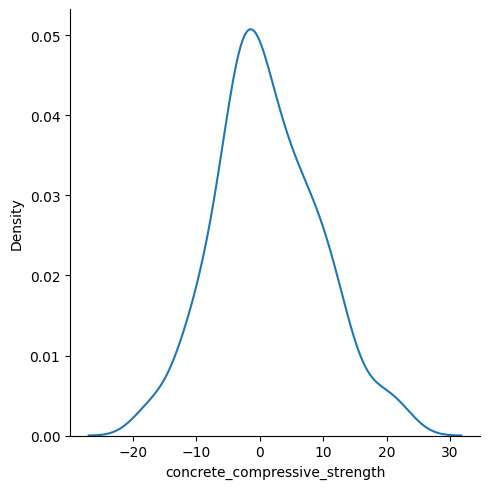

In [58]:
import seaborn as sns
sns.displot(residuals, kind='kde')

In [51]:
print("KNN Training R²:", knn.score(X_train, y_train))
print("KNN Testing R²:", knn.score(X_test, y_test))

KNN Training R²: 0.8008925362681104
KNN Testing R²: 0.737027035491259


In [80]:
import pickle

with open("concrete_strength_model.pkl", "wb") as f:
    pickle.dump(knn, f)
